# Definitions of helper functions for computing bifurcation diagrams

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 
plt.rcParams['figure.figsize'] = (9,6)

# Test!

# Helpful for animations
# https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook/46878531#46878531

/tmp/ipykernel_3952509/3535765383.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
# For scatter plot with many points, switch from svg to png

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('png') 
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['figure.dpi'] = 200

/tmp/ipykernel_3952509/3663763171.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


In [4]:
# Functional programing tools

import functools

# Output is a function
# x -> f(f(...f(x)))  (iterated n times)
def nest(f,n):
    def nested(x0):
        return(functools.reduce(lambda x,_: f(x), range(n),x0))
    return(nested)

#  Output is a generator that takes argument x and iterates over
#  x, f(x), f(f(x)), ...  (0 to n-1 iterates)
def nestGenerator(f,n):
    def nested(x):
        for i in range(n-1):
            yield x
            x = f(x)
        yield x
        
    return(nested)

In [5]:
# Logistic map
def logmap(r):
    return(lambda x: r*x*(1-x))

In [6]:
# keep only 'keep' final iterates, after skipping over 'skip'

def eventual(f,x0,skip,keep):
    x = nest(f,skip)(x0)
        
    return(np.array([y for y in nestGenerator(f,keep)(x)]))

# Bifurcation diagram of the logicstic function

/tmp/ipykernel_3952509/3600391418.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


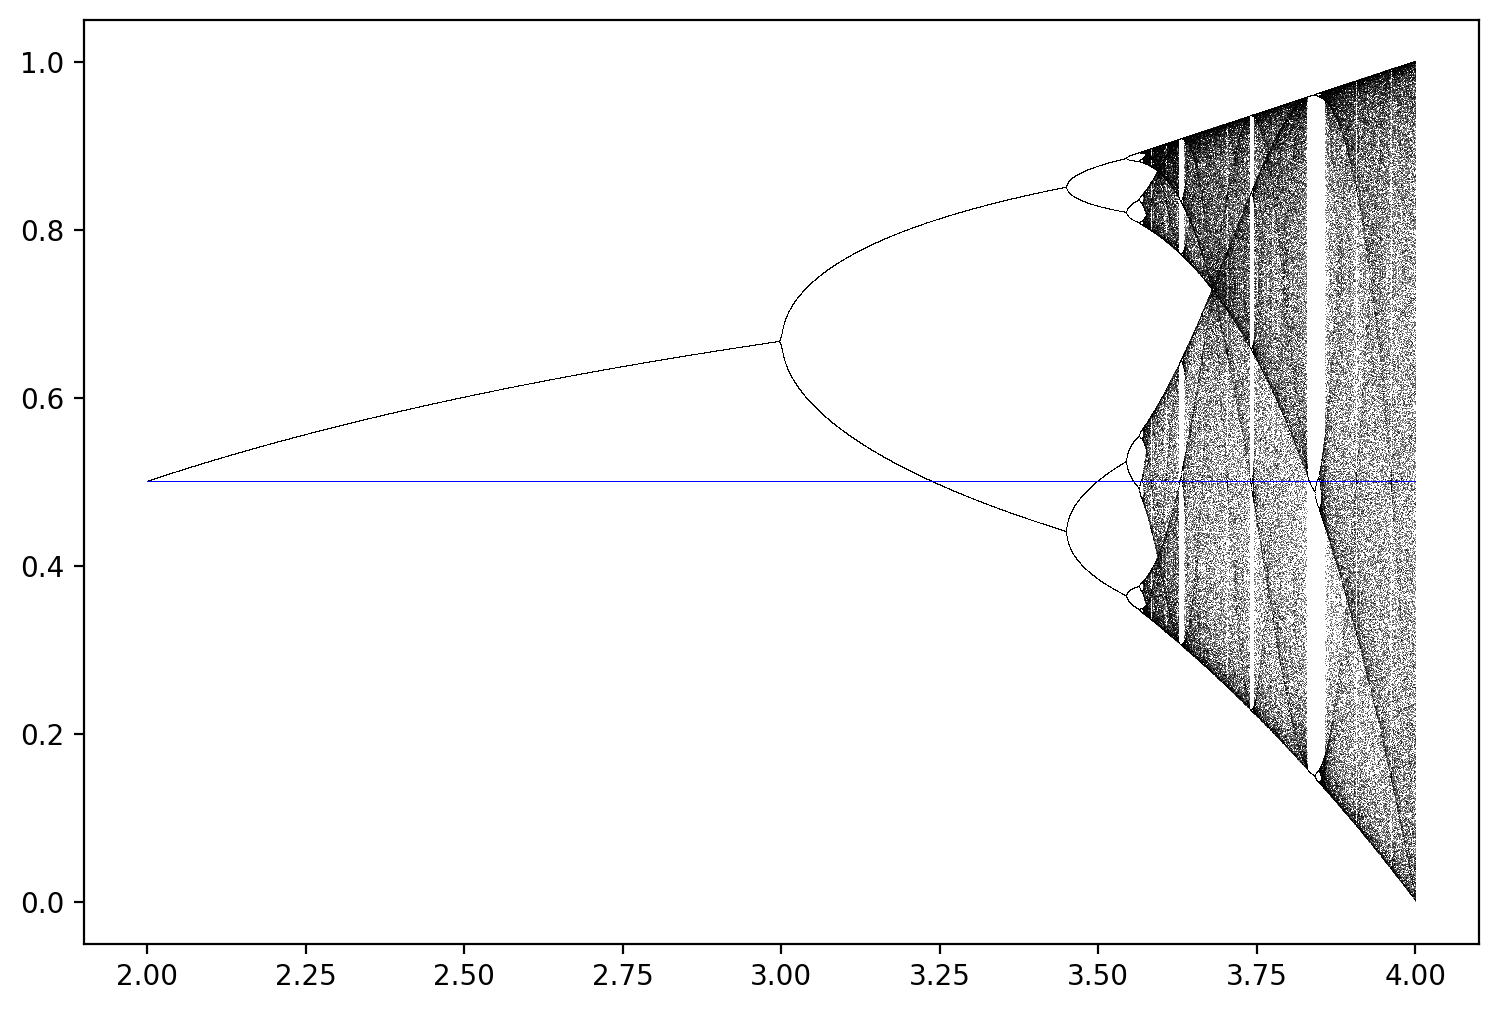

In [8]:
import numpy as np
from scipy.optimize import fsolve

n = 10000
minr = 2.0
maxr = 4
skip = 900
keep = 100

r = np.linspace(minr, maxr, n)

# Operator on vector r, then flatten output for Matplotlib
xf = eventual(logmap(r), .2, skip, keep).transpose().flatten()
rf = np.kron(r,np.ones(keep))

set_matplotlib_formats('png') 
plt.plot(rf, xf, ',k', alpha=.5) 
plt.plot(rf,[.5]*len(rf),',b')  

In [7]:
# Get first two superstable points after 2.0, zoom in for more

def getSuperStable(skip, keep, r0, deltax):
    def f(r):
        pts = eventual(logmap(r),.2,skip,keep) - .5
        return((pts[np.abs(pts) < deltax])[0])

    return(fsolve(f,r0)[0])

R = [2.0, getSuperStable(skip,keep,3.2,.1), getSuperStable(skip,keep,3.45,.1)]

[2.0, 3.2360679774997894, 3.498561699327702]

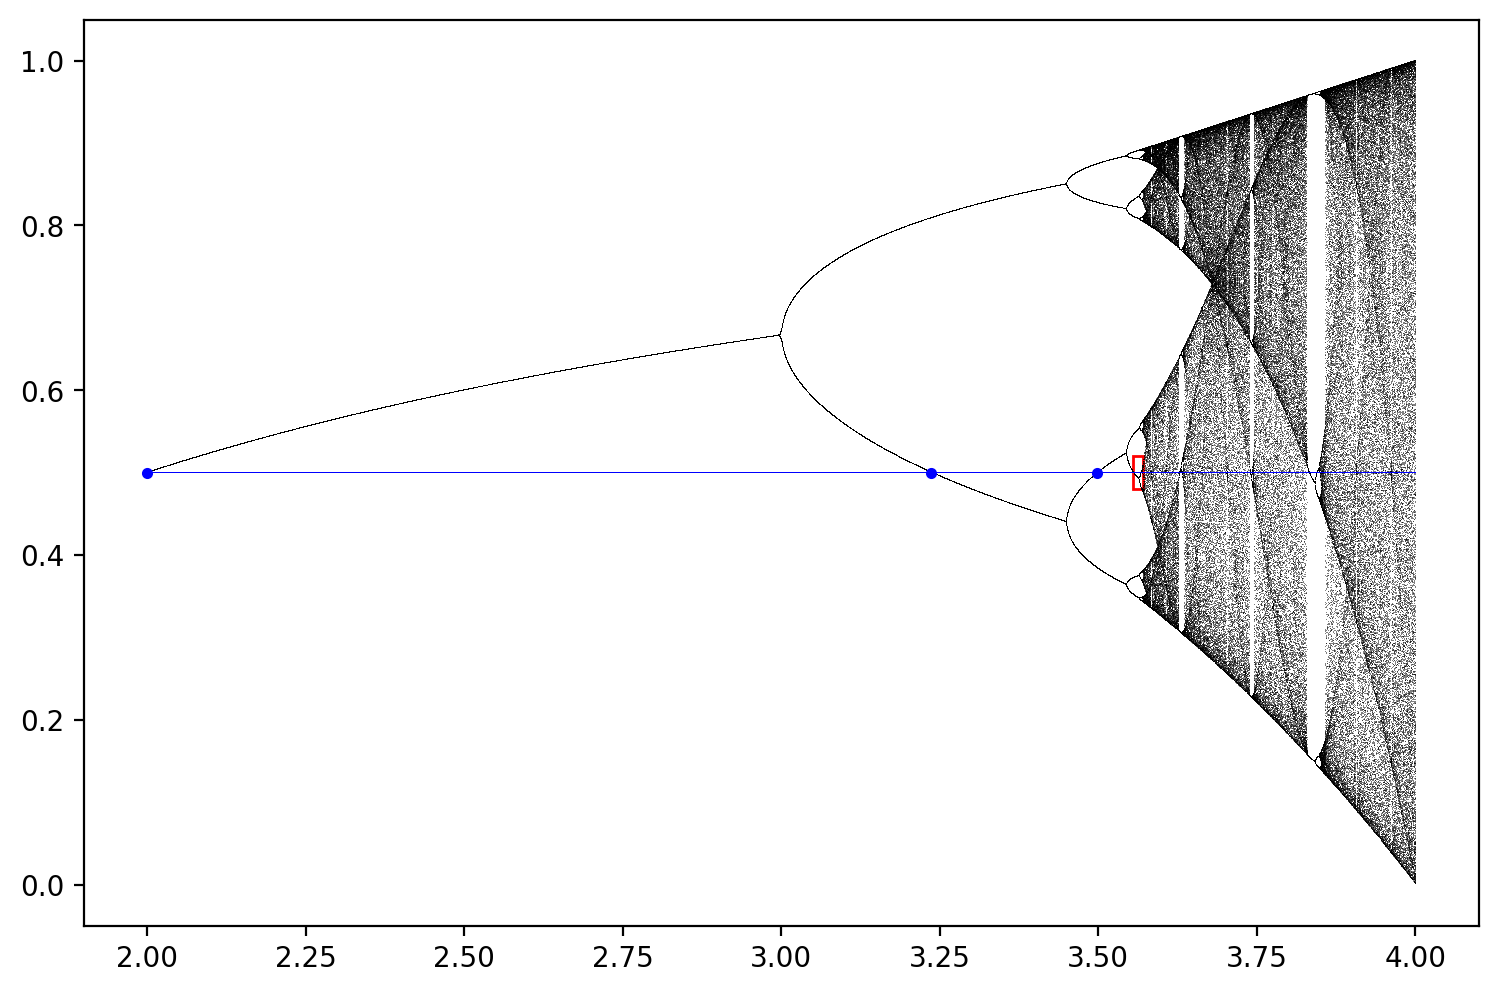

Text(0.5, 1.0, 'Zoomed into red square ("Hallo Herr Rust!")')

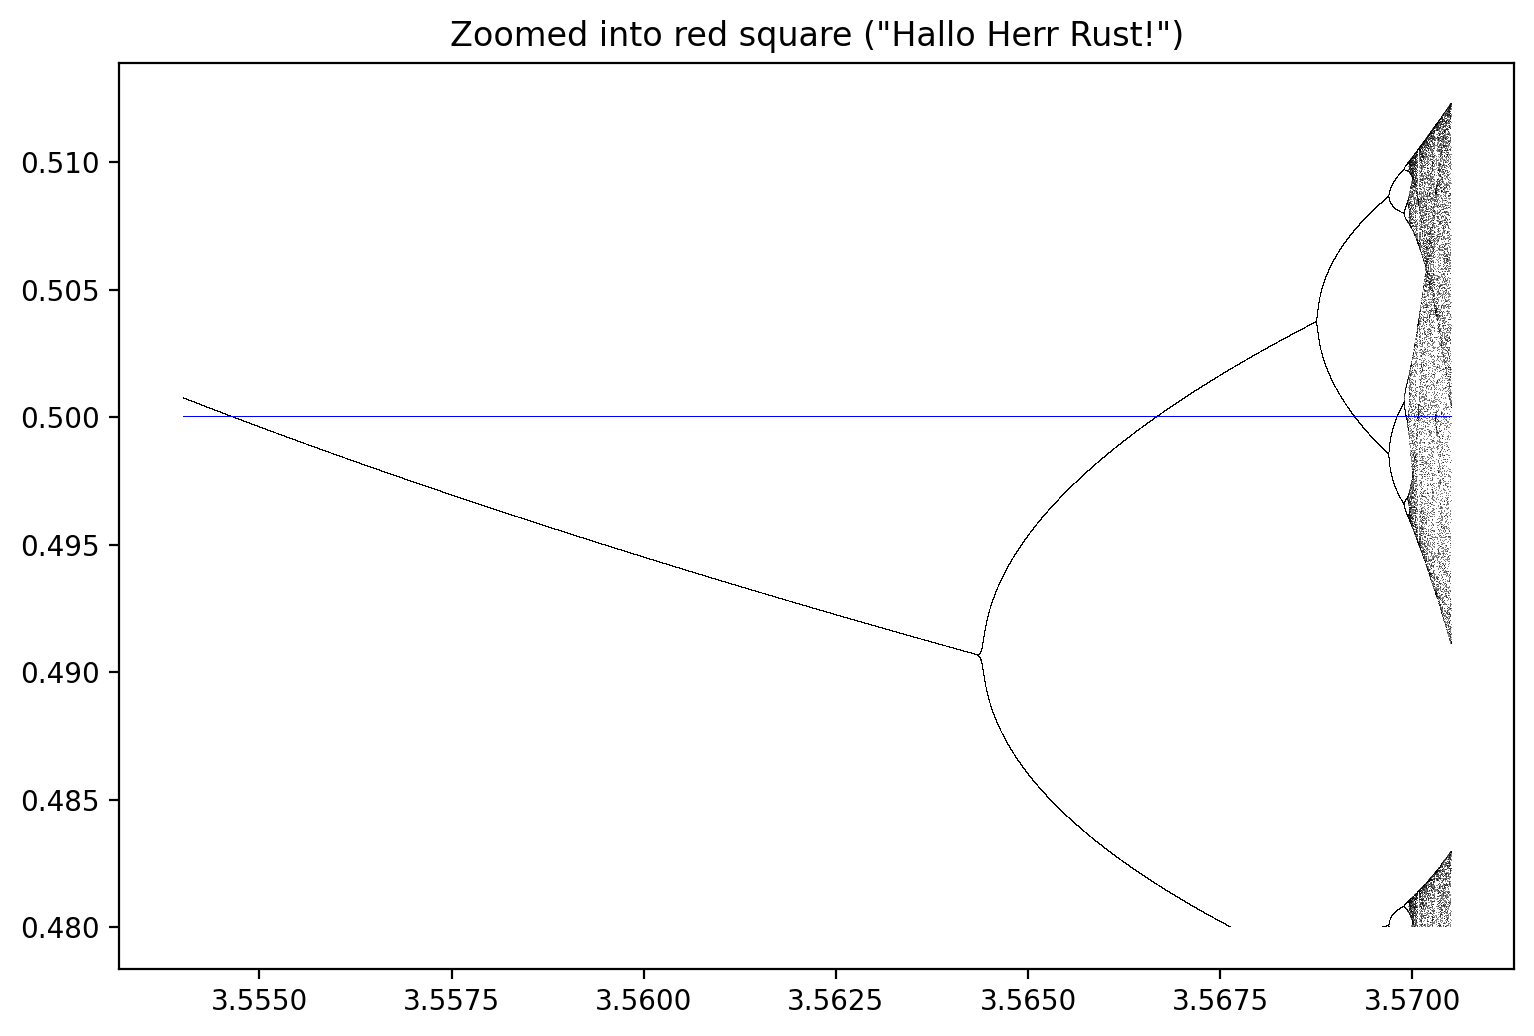

In [8]:
# Zoom in

n = 30000
minr = 3.554
maxr = 3.5705
minx = .48
maxx = .52
skip = 5000
keep = 200

# Old plot for reference
set_matplotlib_formats('png') 
plt.plot(rf, xf, ',k', alpha=.5) 
plt.plot(R, [.5]*len(R), '.b')
plt.plot(rf, [.5]*len(rf),',b')
from matplotlib.patches import Rectangle
plt.gca().add_patch(Rectangle((minr,minx),maxr-minr,maxx-minx,linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

r = np.linspace(minr, maxr, n)
xf = eventual(logmap(r), .2, skip, keep).transpose().flatten()
xfilter = (minx<=xf[:]) & (xf[:]<=maxx)
xf = xf[xfilter]
rf = np.kron(r,np.ones(keep))[xfilter]

plt.show()

plt.plot(rf, xf, ',k', alpha=.5) 
plt.plot(rf,[.5]*len(rf),',b')   # Mark show super-stable points
plt.title("Zoomed into red square (\"Hallo Herr Rust!\")")

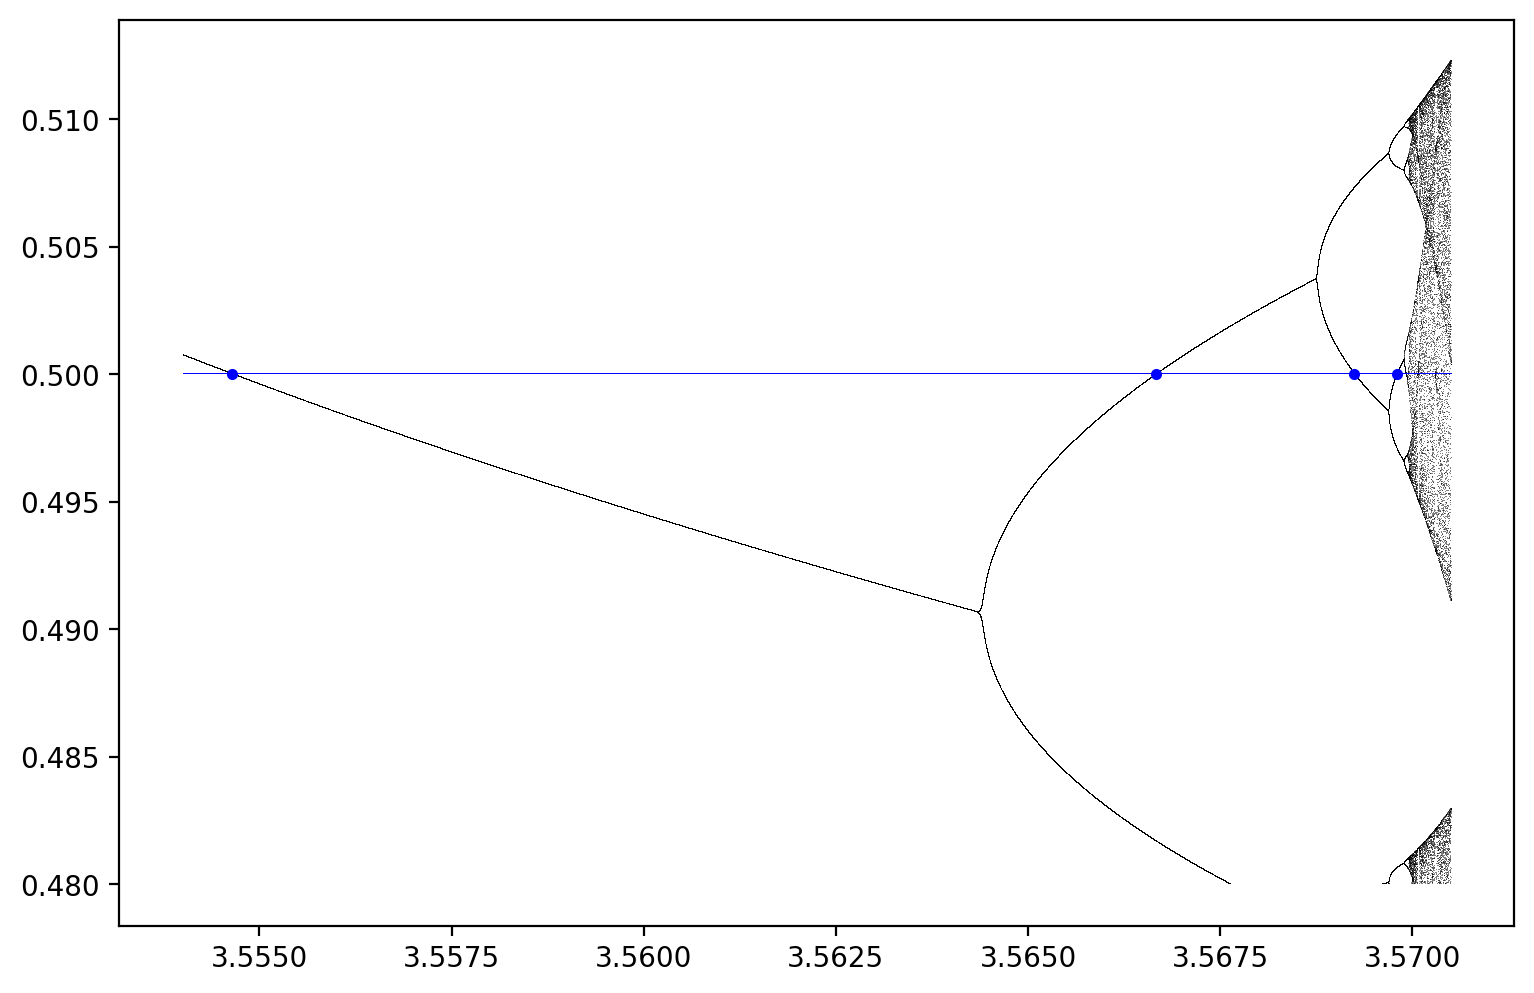

In [65]:
R = R + [getSuperStable(skip, keep, 3.555, .002), getSuperStable(skip, keep, 3.567, .002), getSuperStable(skip, keep, 3.5694, .002), getSuperStable(skip, keep, 3.5698, .001) ]

plt.plot(rf, xf, ',k', alpha=.5) 
plt.plot(R[3:], [.5]*(len(R)-3), '.b')
plt.plot(rf,[.5]*len(rf),',b')

In [66]:
# First r's admitting superstable orbits
R

[2.0,
 3.2360679774997894,
 3.498561699327702,
 3.5546408627703956,
 3.566667379856251,
 3.5692435316356517,
 3.5697952937500097]

In [68]:
# Twice the distance to unstable fixed point

b = 2*np.array([.5-fsolve(lambda x: nest(logmap(R[k]),2**(k-1))(x) - x, .5)[0] for k in range(1,len(R))])
b = np.insert(b, 0, 1)

a=1/b # More commonly used parameterization

array([   1.        ,   -2.61803399,    7.03084891,  -17.75487061,
         44.54333438, -111.53652515,  279.19356684])

In [69]:
# Successive ratios

[a[n+1]/a[n] for n in range(len(R)-1)]

[-2.6180339887498953,
 -2.685545315220808,
 -2.5252812044648536,
 -2.508795212065474,
 -2.5040003557525585,
 -2.503158193945675]

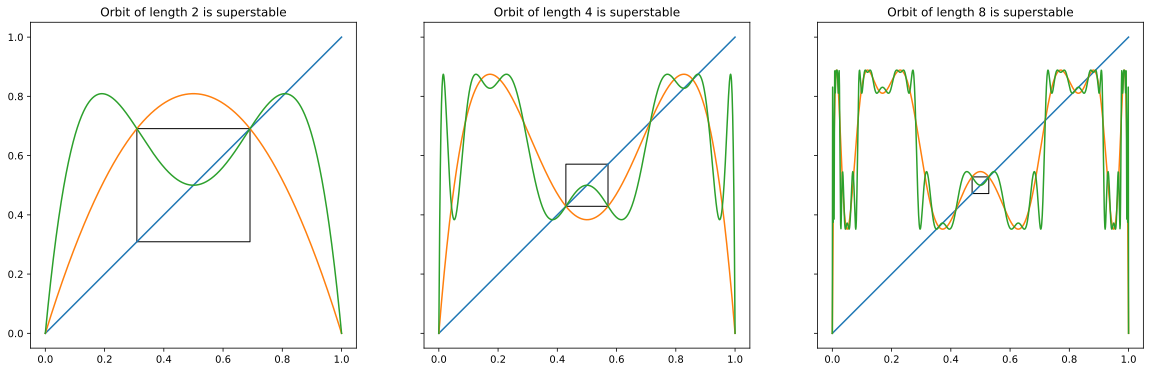

In [53]:
# Switch back to vector graphics
set_matplotlib_formats('svg') 

x = np.linspace(0,1,1000)

kmax = 4

fig, axes = plt.subplots(1, kmax-1, figsize = (20,6), sharey=True)

for k in range(1,kmax):
    axes[k-1].plot(x,x)
    axes[k-1].set_aspect('equal')
    axes[k-1].plot(x,nest(logmap(R[k]),2**(k-1))(x))
    axes[k-1].plot(x,nest(logmap(R[k]),2**k)(x))
    axes[k-1].add_patch(Rectangle((.5-.5*np.abs(b[k]),.5-.5*np.abs(b[k])),np.abs(b[k]),np.abs(b[k]),edgecolor='k',facecolor='none'))
    axes[k-1].set_title(f"Orbit of length {2**(k)} is superstable")

Text(0.5, 1.0, 'g0')

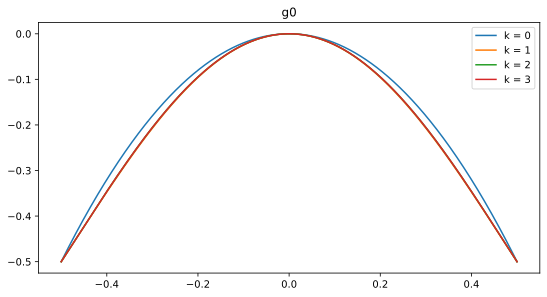

In [54]:
s = np.linspace(-.5, .5, 1000)

plt.axes().set_aspect('equal')
for k in range(4):
    plt.plot(s, (lambda y: a[k]*(nest(logmap(R[k]),2**k)(.5+y/a[k])-.5))(s), label = f"k = {k}")
plt.legend(loc='best')
plt.title("g0")

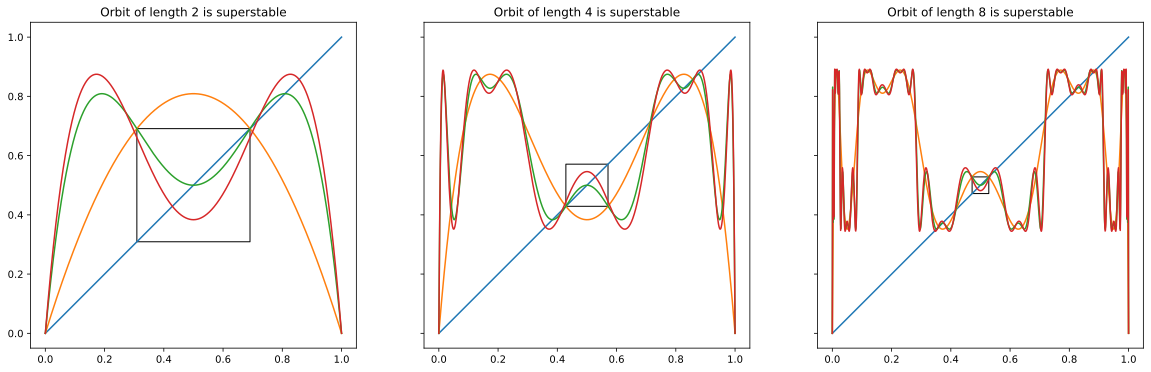

In [55]:
x = np.linspace(0,1,1000)

kmax = 4

fig, axes = plt.subplots(1, kmax-1, figsize = (20,6), sharey=True)

for k in range(1,kmax):
    axes[k-1].plot(x,x)
    axes[k-1].set_aspect('equal')
    axes[k-1].plot(x,nest(logmap(R[k]),2**(k-1))(x))
    axes[k-1].plot(x,nest(logmap(R[k]),2**k)(x))
    axes[k-1].plot(x,nest(logmap(R[k+1]),2**k)(x))
    axes[k-1].add_patch(Rectangle((.5-.5*np.abs(b[k]),.5-.5*np.abs(b[k])),np.abs(b[k]),np.abs(b[k]),edgecolor='k',facecolor='none'))
    axes[k-1].set_title(f"Orbit of length {2**(k)} is superstable")

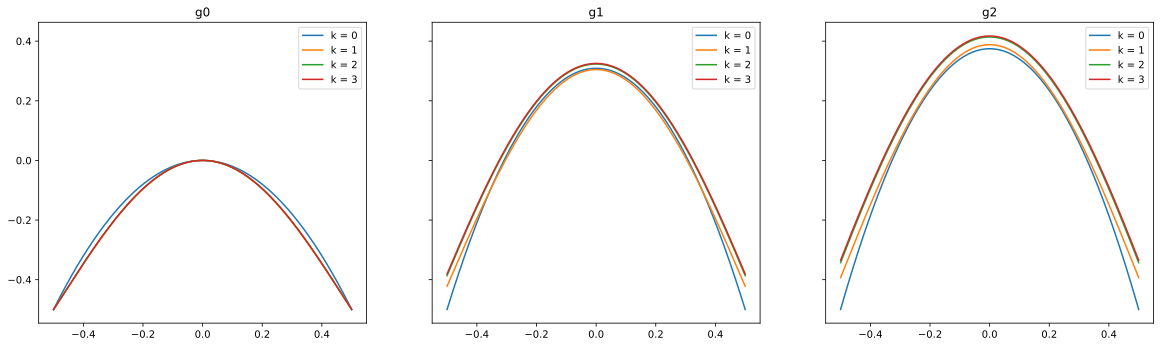

In [38]:
s = np.linspace(-.5, .5, 1000)

a=1/b # More commonly used parameterization

fig, axes = plt.subplots(1, 3, figsize = (20,6), sharey=True)

for i in range(3):
    for k in range(kmax):
        axes[i].set_aspect('equal')
        axes[i].plot(s, (lambda y: a[k]*(nest(logmap(R[k+i]),2**k)(.5+y/a[k])-.5))(s), label = f"k = {k}")
        axes[i].set_title(f"g{i}")
        axes[i].legend(loc='best')